In [1]:
#importing the libraries
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#reading the data
df= pd.read_csv("CompanyDefault.csv")

In [3]:
df.head()

,Num,default,Total_assets,Total_income,PAT_as_%_of_total_income,PBDITA_as_%_of_total_income,PBT_as_%_of_total_income,Cash_profit_as_%_of_total_income,Current_ratio,Debt_to_equity_ratio
0,1,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,2,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,3,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,4,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,5,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


In [4]:
df.tail()               #need to change the names of columns to make it short

,Num,default,Total_assets,Total_income,PAT_as_%_of_total_income,PBDITA_as_%_of_total_income,PBT_as_%_of_total_income,Cash_profit_as_%_of_total_income,Current_ratio,Debt_to_equity_ratio
1379,2848,0,1117.600,1385.700,4.272209,12.463015,4.936133,9.013495,1.35,0.40
1380,2849,0,994.900,928.800,7.870370,15.385444,10.658915,12.489233,1.07,0.06
1381,2850,0,1028.100,1332.000,13.634760,23.918919,18.160586,17.987988,2.21,0.11
1382,2851,0,2059.000,3449.826,5.264468,10.380668,7.011919,7.216219,0.60,0.12
1383,3472,0,2275.971,3449.826,5.264468,10.380668,7.011919,7.216219,2.83,0.08


In [6]:
df.shape

(1384, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Num                               1384 non-null   int64  
 1   default                           1384 non-null   int64  
 2   Total_assets                      1384 non-null   float64
 3   Total_income                      1384 non-null   float64
 4   PAT_as_%_of_total_income          1384 non-null   float64
 5   PBDITA_as_%_of_total_income       1384 non-null   float64
 6   PBT_as_%_of_total_income          1384 non-null   float64
 7   Cash_profit_as_%_of_total_income  1384 non-null   float64
 8   Current_ratio                     1384 non-null   float64
 9   Debt_to_equity_ratio              1384 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 108.2 KB


In [7]:
df.isnull().sum().sum()  #total sum of nan values in dataframe

0

In [8]:
df.duplicated().sum()    # no duplicate values 

0

### Observations: 

1. There are 1384 rows and 10 columns in the dataframe. All the columns are numeric datatype. 
2. "default" seems to be the dependent column in the dataframe and others as just the predictor of default. 
3. There is a "Num" column available in the dataset. We might drop this column as it is just adding particular number for the company and we will not need it as predictor to predict default. 
4. There are no null entries in data (We'll check for bad data)
5. There are no duplicated entries in the dataset. 


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,1384.0,1028.897399,803.174141,1.0,346.750000,692.500000,1718.250000,3472.0000
default,1384.0,0.234104,0.423591,0.0,0.000000,0.000000,0.000000,1.0000
Total_assets,1384.0,256.762568,404.127921,0.5,25.800000,103.450000,296.825000,2275.9710
Total_income,1384.0,381.657131,583.461117,0.1,31.225000,187.550000,428.142581,3449.8260
PAT_as_%_of_total_income,1384.0,-29.922088,346.245121,-9700.0,0.000000,1.464327,4.075183,150.0000
PBDITA_as_%_of_total_income,1384.0,-4.380180,218.854784,-6400.0,3.501816,8.569963,13.438735,100.0000
PBT_as_%_of_total_income,1384.0,-27.554086,332.137949,-9700.0,0.000000,2.148565,5.345512,100.0000
Cash_profit_as_%_of_total_income,1384.0,-16.239313,245.587280,-6400.0,1.045456,4.638115,8.024023,100.0000
Current_ratio,1384.0,1.771303,2.323773,0.0,0.880000,1.230000,1.942500,18.7900
Debt_to_equity_ratio,1384.0,3.394933,11.364884,0.0,0.187500,0.860000,1.970000,90.9441


In [3]:
#Profit after Tax % of total income
#Profit Before Depreciation, Interest and Tax  % of total income
#Profit Before Tax % of total income

df.columns = df.columns.str.replace("as_%_of", "to")

In [14]:
df.head()                    #looks better now 

,Num,default,Total_assets,Total_income,PAT_to_total_income,PBDITA_to_total_income,PBT_to_total_income,Cash_profit_to_total_income,Current_ratio,Debt_to_equity_ratio
0,1,1,210.5,125.3,-25.059856,-10.454908,-25.059856,-19.792498,0.86,2.99
1,2,1,674.4,939.6,-5.487016,-0.723712,-5.487016,-4.252448,0.87,48.74
2,3,1,288.3,1.2,-2233.333333,-1785.083333,-2175.000000,-2100.000000,1.40,0.28
3,4,1,32.2,30.3,-15.511551,-6.930693,-15.181518,-12.541254,0.44,24.50
4,5,1,380.9,24.6,-208.943089,-1.626016,-208.536585,-142.276423,1.17,10.37


In [4]:
df.drop(['Num'], axis=1, inplace=True)            #dropped Num column 

## Univatriate, Bivariate and Multivariate Analysis

0    0.765896
1    0.234104
Name: default, dtype: float64



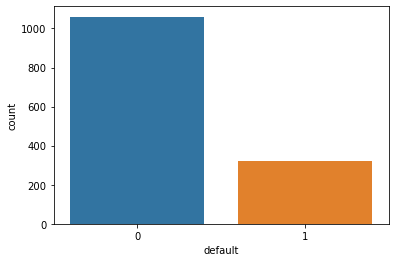

In [18]:
print(df['default'].value_counts(normalize=True))
print("")
sns.countplot(df['default'])
plt.show();

#76% of the data belongs to non default while 23 % belongs to default
#This column is only categorical column

In [5]:
df1 = df.drop(['default'],axis=1)

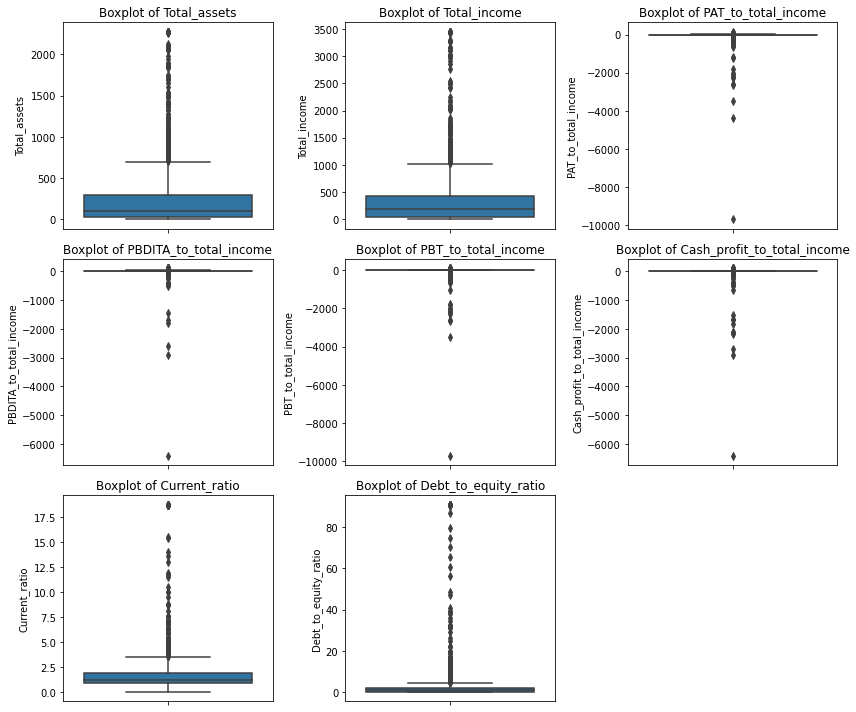

In [30]:
plt.figure(figsize = (12,10))
feature_list = df1.columns #To acess all columns
for i in range(len(feature_list)):  # Instead of giving instructions again and again, running for loop 
        plt.subplot(3,3,i+1) #How many subplot do we require- rows and columns. Indexing starts from 1
        sns.boxplot(y= df1[feature_list[i]], data = df1) #boxplot
        plt.title('Boxplot of {}'.format(feature_list[i]))
        plt.tight_layout();
        
#all columns have outlier

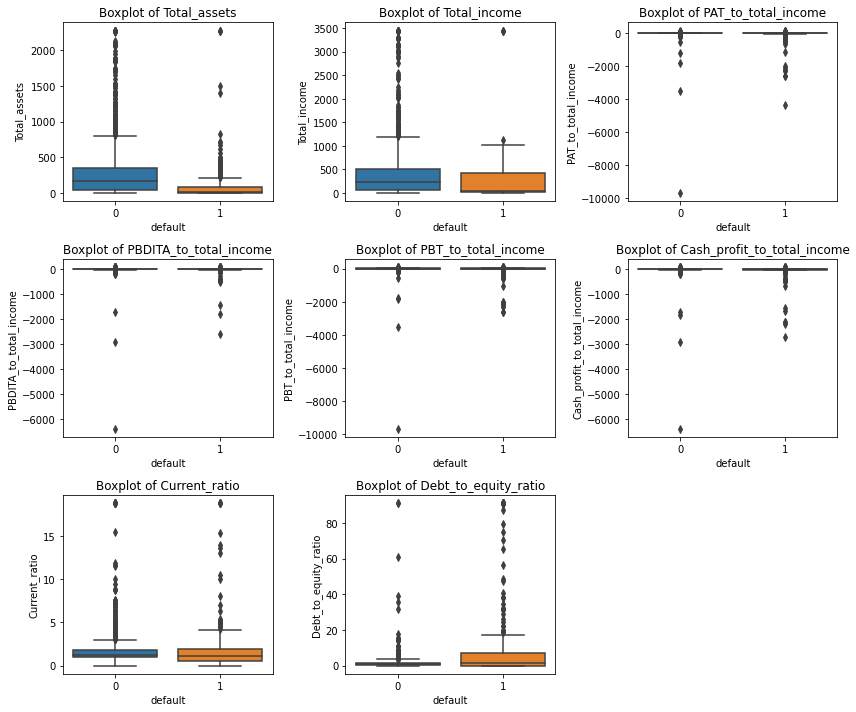

In [29]:
plt.figure(figsize = (12,10))
feature_list = df1.columns #To acess all columns
for i in range(len(feature_list)):  # Instead of giving instructions again and again, running for loop 
        plt.subplot(3,3,i+1) #How many subplot do we require- rows and columns. Indexing starts from 1
        sns.boxplot(y= df1[feature_list[i]], x=df['default'], data = df1) #boxplot
        plt.title('Boxplot of {}'.format(feature_list[i]))
        plt.tight_layout();

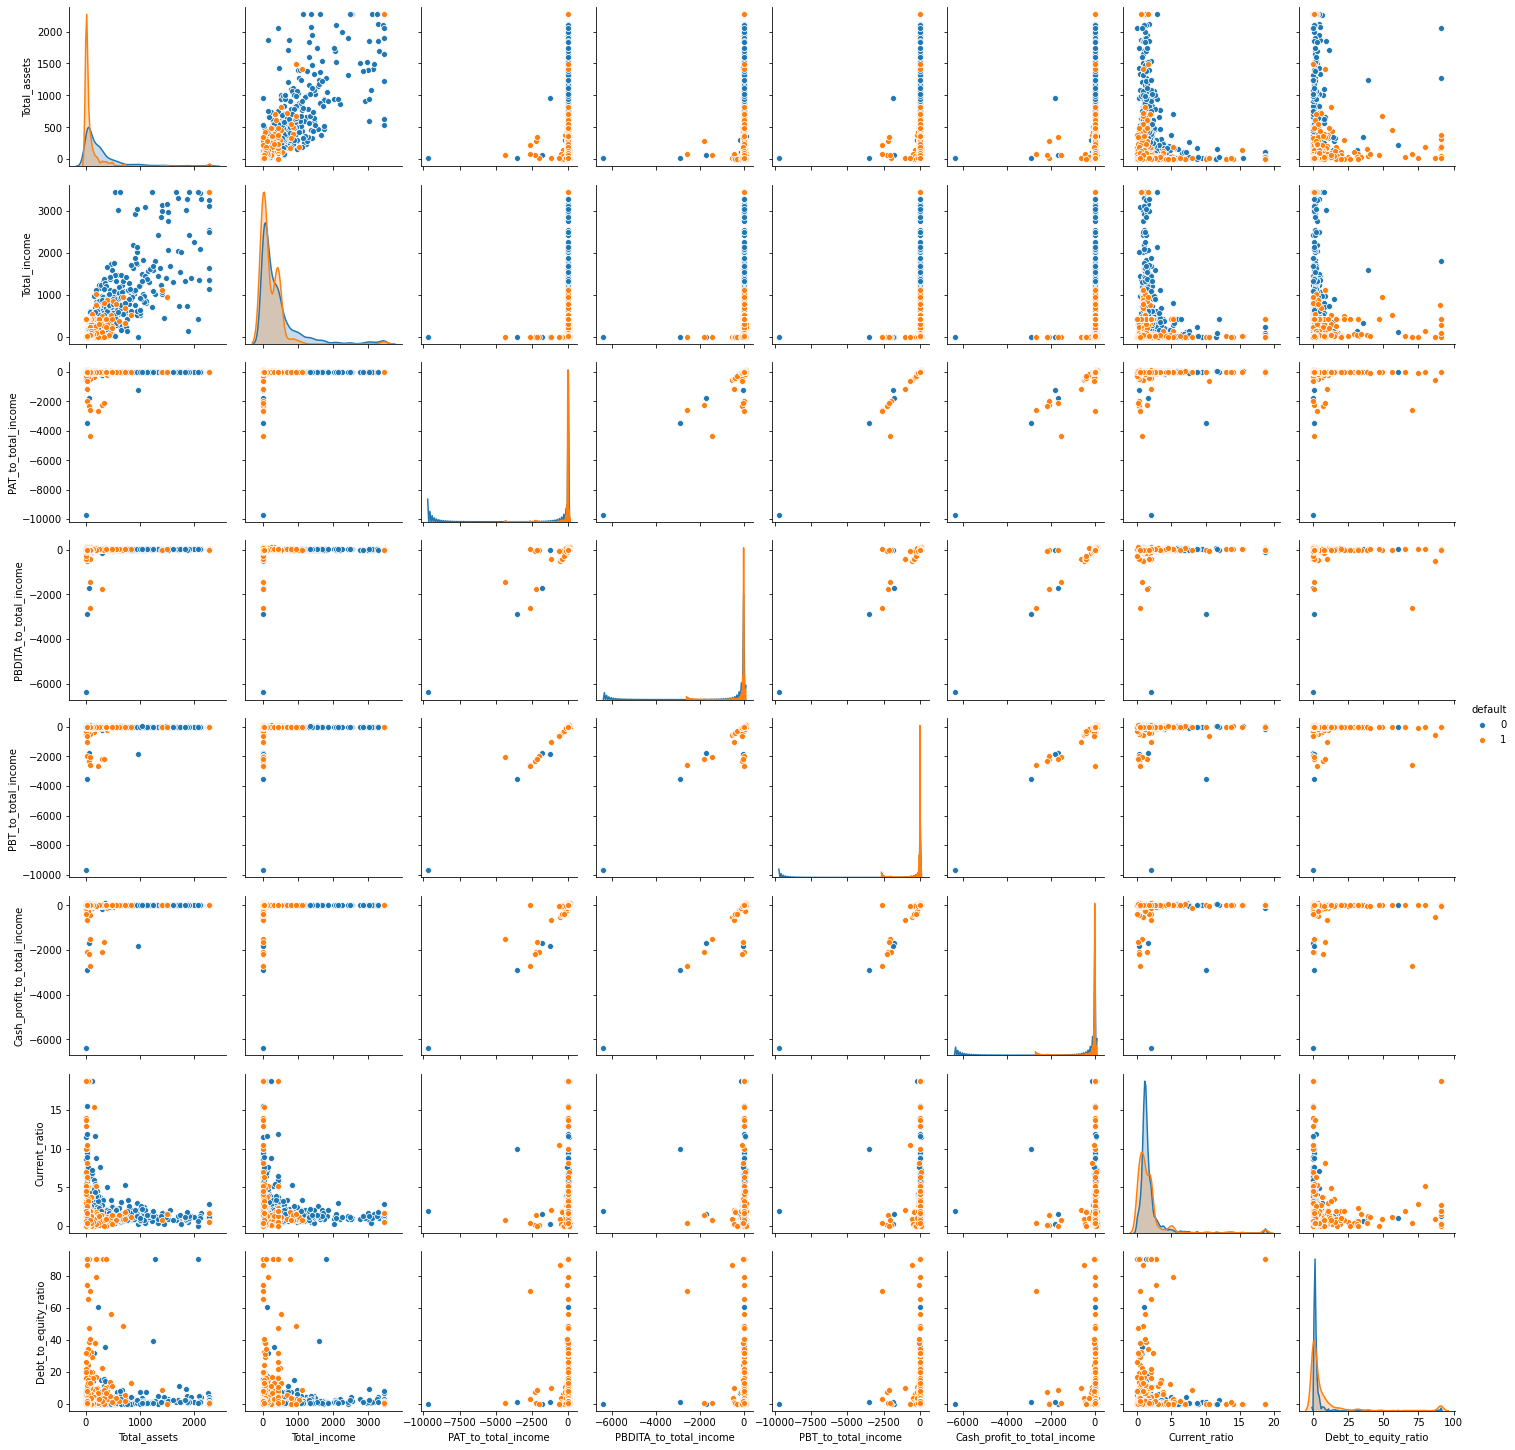

In [23]:
sns.pairplot(df, hue='default', diag_kind = 'kde')

#default 1 - Orange
#default 0 - Blue

### Observations:

6. Skewness

   -> Total assest, Total income, Current_ratio and Debt to equity_ratio are right skewed.
   
   -> pat_to_total income, pbdita_to_total income, pbt_to_total income, cash_profit_to_total income seemed to be left skewed. While all the defaults and non defaults are segregated for these columns.


7. Multivariate Analysis Numerical varaiables and Default.

   -> positive relation between total_assest and total income
   
   -> assest can be a good factor to decide default and non default. More the asset, lower the default(0)
   
   -> total income not a good factor. But boxplot shows higher the total income lower the default
   
   -> We observe a segregated picture for these columns pat,pbdita,pbt,cash_profit to total income  for default and non defaults
   
   -> current ratio not a good factor overlapping. Boxplot shows nearly equal median for both class.
   
   -> debt to equity ratio not a good factor overlapping. though it has more upper limit and more outliers at higher level

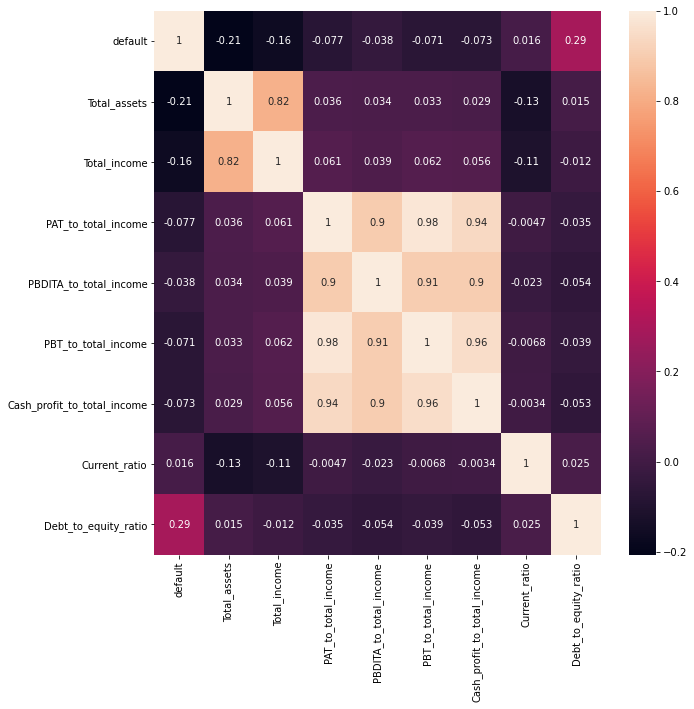

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True );

### Observations:

8. Correlation

   -> High correlation between total_assest and total income (as we have already observed in pairplots)
   
   -> pat_to_total income, pbdita_to_total income, pbt_to_total income, cash_profit_to_total income show very high correlation amongst each other.
   
   -> pbt_to_total income and pat_to_total income shows almost 100% as correlation


## Model Building (Without treating outliers)

In [5]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
#validation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [6]:
#seperating
x=df.drop('default',axis=1)
y=df.pop('default')

In [7]:
#test_train_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=7)

In [50]:
y_train.value_counts()

0    740
1    228
Name: default, dtype: int64

In [51]:
y_test.value_counts()

0    320
1     96
Name: default, dtype: int64

In [9]:
#training the model
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [10]:
#predicting 
y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test)
y_train_predict_proba=model.predict_proba(x_train)
y_test_predict_proba=model.predict_proba(x_test)

The accuracy of the model is  0.8140495867768595


Confusion Matrix
[[731   9]
 [171  57]]


Classification Report
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       740
           1       0.86      0.25      0.39       228

    accuracy                           0.81       968
   macro avg       0.84      0.62      0.64       968
weighted avg       0.82      0.81      0.77       968



Area under the curve is 0.8361605026078711


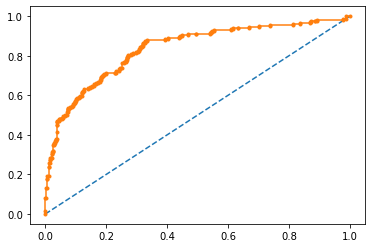

In [11]:
#For train set 
print('The accuracy of the model is ', model.score(x_train,y_train))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_train, y_train_predict))
print('\n')
print('Classification Report')
print(classification_report(y_train, y_train_predict))
print('\n')
auc=roc_auc_score(y_train,y_train_predict_proba[:,1])
print('Area under the curve is', auc)
fpr,tpr,threshold=roc_curve(y_train,y_train_predict_proba[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show();

The accuracy of the model is  0.7908653846153846


Confusion Matrix
[[314   6]
 [ 81  15]]


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       320
           1       0.71      0.16      0.26        96

    accuracy                           0.79       416
   macro avg       0.75      0.57      0.57       416
weighted avg       0.78      0.79      0.73       416



Area under the curve is 0.8361605026078711


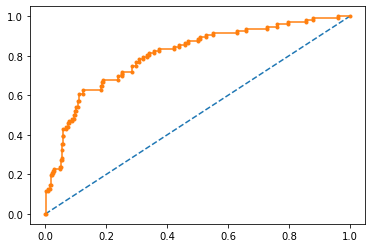

In [12]:
#For test set 
print('The accuracy of the model is ', model.score(x_test,y_test))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_test_predict))
print('\n')
print('Classification Report')
print( classification_report(y_test, y_test_predict))
print('\n')
auc1=roc_auc_score(y_test,y_test_predict_proba[:,1])
print('Area under the curve is', auc)
fpr,tpr,threshold=roc_curve(y_test,y_test_predict_proba[:,1])
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show();

#### Though the accuracy score of the model doesnot seemed to change in train and test dataset. but the precision, recall and f1 score on the unseen dataset has declined significantly. The model seem to be not performing well on the test data set.


## Model Building (treating outliers and Statsmodel)

treating outliers doesnot influence the accuracy of the model.

In [8]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range  

In [9]:
for columns in x.columns:
    lr,ur= remove_outliers(x[columns])
    x[columns] = np.where(x[columns]>ur,ur,x[columns])
    x[columns] = np.where(x[columns]<lr,lr,x[columns])

In [10]:
default=pd.concat([x,y],axis=1)


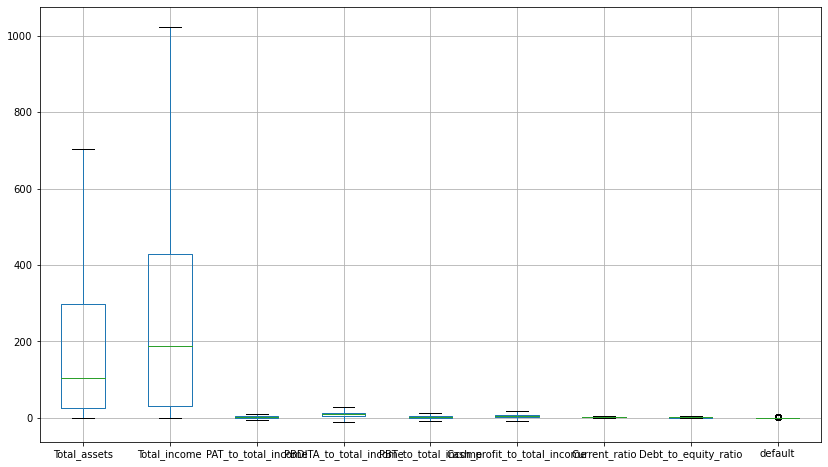

In [16]:
plt.figure(figsize=(14,8))
default.boxplot();

In [11]:
import statsmodels.formula.api as SM

In [12]:
default.columns

Index(['Total_assets', 'Total_income', 'PAT_to_total_income',
       'PBDITA_to_total_income', 'PBT_to_total_income',
       'Cash_profit_to_total_income', 'Current_ratio', 'Debt_to_equity_ratio',
       'default'],
      dtype='object')

In [13]:
f= 'default ~ Total_assets + Total_income + PAT_to_total_income+ PBDITA_to_total_income + PBT_to_total_income+ Cash_profit_to_total_income +Current_ratio +Debt_to_equity_ratio'

In [14]:
model_stats = SM.logit(formula=f,data=default).fit()

Optimization terminated successfully.
         Current function value: 0.414667
         Iterations 7


In [21]:
#summary
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 1384
Model:                          Logit   Df Residuals:                     1375
Method:                           MLE   Df Model:                            8
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.2380
Time:                        00:26:54   Log-Likelihood:                -573.90
converged:                       True   LL-Null:                       -753.16
Covariance Type:            nonrobust   LLR p-value:                 1.378e-72
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.9072      0.193     -4.693      0.000      -1.286      -0.528
Total_assets                   -0.0079      0.001    -10.203      0.000      -0.009      -0.006
Total_income                    0.0016      0.000      3.777      0.000       0.001       0.002
PAT_to_total_income             0.0406      0.068      0.601      0.548      -0.092       0.173
PBDITA_to_total_income          0.0331      0.015      2.186      0.029       0.003       0.063
PBT_to_total_income            -0.0845      0.053     -1.588      0.112      -0.189       0.020
Cash_profit_to_total_income    -0.0605      0.022     -2.757      0.006      -0.104      -0.018
Current_ratio                  -0.1658      0.081     -2.046      0.041      -0.325      -0.007
Debt_to_equity_ratio            0.4780      0.049      9.665      0.000       0.381       0.575
===============================================================================================
"""

PAT_to_total_income, PBT_to_total_income seems to be insignificant in building the model. This might be due to high correlation we noticed in heatmap.

In [ ]:
#There are number of variables and some of them are correlated to each other, 
#Let us now check if the independent variable shows high VIF it means the column is redundant
#Consequently, We will keep most important variables (more than 5 not a good factor)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(x):
    vif= pd.DataFrame() #empty
    vif['Variables']=x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return (vif)

In [25]:
X = default.drop(['default'], axis=1)
cal_vif(X).sort_values(by='VIF',ascending=False)

,Variables,VIF
4,PBT_to_total_income,21.102170
2,PAT_to_total_income,19.296923
5,Cash_profit_to_total_income,7.997149
3,PBDITA_to_total_income,7.834539
0,Total_assets,5.199503
1,Total_income,5.155808
6,Current_ratio,1.983593
7,Debt_to_equity_ratio,1.857565


In [26]:
X = X.drop(['PBT_to_total_income'], axis=1)
cal_vif(X).sort_values(by='VIF',ascending=False)

#notice VIF for PAT_to_total_income has declined 

,Variables,VIF
4,Cash_profit_to_total_income,7.876186
3,PBDITA_to_total_income,7.775399
0,Total_assets,5.199503
1,Total_income,5.140456
2,PAT_to_total_income,3.500457
5,Current_ratio,1.983329
6,Debt_to_equity_ratio,1.845903


In [27]:
X = X.drop(['Cash_profit_to_total_income'], axis=1)
cal_vif(X).sort_values(by='VIF',ascending=False)


,Variables,VIF
0,Total_assets,5.197439
1,Total_income,5.139785
3,PBDITA_to_total_income,3.914149
2,PAT_to_total_income,2.814014
4,Current_ratio,1.977934
5,Debt_to_equity_ratio,1.793156


In [29]:
X = X.drop(['Total_assets'], axis=1)
cal_vif(X).sort_values(by='VIF',ascending=False)

,Variables,VIF
2,PBDITA_to_total_income,3.664134
1,PAT_to_total_income,2.758106
3,Current_ratio,1.955957
4,Debt_to_equity_ratio,1.757982
0,Total_income,1.697737


In [ ]:
#building the model through stats model

In [40]:
X.columns

Index(['Total_income', 'PAT_to_total_income', 'PBDITA_to_total_income',
       'Current_ratio', 'Debt_to_equity_ratio'],
      dtype='object')

In [36]:
Y= default['default']

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7)

In [38]:
default_train = pd.concat([X_train,Y_train], axis=1)
default_test = pd.concat([X_test,Y_test], axis=1)

In [43]:
model_stats1 = SM.logit(formula='default~Total_income+ PAT_to_total_income + PBDITA_to_total_income +Current_ratio +Debt_to_equity_ratio',data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.464901
         Iterations 6


In [44]:
#summary
model_stats1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      962
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.1483
Time:                        13:11:03   Log-Likelihood:                -450.02
converged:                       True   LL-Null:                       -528.41
Covariance Type:            nonrobust   LLR p-value:                 4.813e-32
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.8623      0.220     -3.927      0.000      -1.293      -0.432
Total_income              -0.0021      0.000     -6.189      0.000      -0.003      -0.001
PAT_to_total_income       -0.0447      0.028     -1.598      0.110      -0.100       0.010
PBDITA_to_total_income    -0.0268      0.013     -2.104      0.035      -0.052      -0.002
Current_ratio             -0.0647      0.094     -0.687      0.492      -0.249       0.120
Debt_to_equity_ratio       0.3755      0.053      7.064      0.000       0.271       0.480
==========================================================================================
"""

In [ ]:
#eliminating variable with high value of p. 

In [45]:
model_stats2 = SM.logit(formula='default~Total_income + PBDITA_to_total_income +Current_ratio +Debt_to_equity_ratio',data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.466192
         Iterations 6


In [47]:
model_stats2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      963
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.1460
Time:                        13:13:55   Log-Likelihood:                -451.27
converged:                       True   LL-Null:                       -528.41
Covariance Type:            nonrobust   LLR p-value:                 2.466e-32
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7908      0.215     -3.686      0.000      -1.211      -0.370
Total_income              -0.0022      0.000     -6.806      0.000      -0.003      -0.002
PBDITA_to_total_income    -0.0420      0.009     -4.774      0.000      -0.059      -0.025
Current_ratio             -0.0668      0.094     -0.710      0.478      -0.251       0.118
Debt_to_equity_ratio       0.3984      0.051      7.772      0.000       0.298       0.499
==========================================================================================
"""

In [ ]:
#dropping current ratio as it is not significant

In [49]:
model_stats3 = SM.logit(formula='default~Total_income + PBDITA_to_total_income+Debt_to_equity_ratio',data=default_train).fit()

Optimization terminated successfully.
         Current function value: 0.466454
         Iterations 6


In [50]:
model_stats3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                  968
Model:                          Logit   Df Residuals:                      964
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                  0.1455
Time:                        13:14:39   Log-Likelihood:                -451.53
converged:                       True   LL-Null:                       -528.41
Covariance Type:            nonrobust   LLR p-value:                 4.049e-33
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.9032      0.146     -6.181      0.000      -1.190      -0.617
Total_income              -0.0022      0.000     -6.774      0.000      -0.003      -0.002
PBDITA_to_total_income    -0.0422      0.009     -4.793      0.000      -0.059      -0.025
Debt_to_equity_ratio       0.4058      0.050      8.076      0.000       0.307       0.504
==========================================================================================
"""

In [ ]:
#all of them are significant

In [52]:
y_prob_train = model_stats3.predict(default_train)

In [106]:
y_prob_test = model_stats3.predict(default_test)

In [53]:
y_prob_train 

445     0.137342
1241    0.174000
272     0.486483
820     0.132605
1249    0.105583
          ...   
211     0.395660
502     0.167361
537     0.111130
1220    0.098938
175     0.399038
Length: 968, dtype: float64

In [55]:
#converting the prediction to class 
#higher than 0.50 default otherwise non default
y_class_pred = []
for i in range (0, len(y_prob_train)):
    if np.array(y_prob_train)[i]>0.50:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [58]:
#higher than 0.50 default otherwise non default
y_class_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
from sklearn import metrics

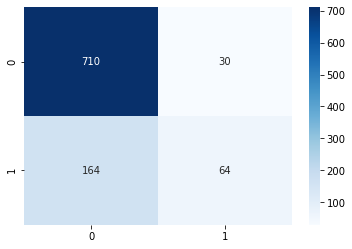

In [65]:
sns.heatmap((metrics.confusion_matrix(default_train['default'],y_class_pred)), annot=True,cmap="Blues", fmt='0');

In [66]:
(710+164)/(710+164+30+64) #improved accuracy

0.9028925619834711

In [69]:
64/94 #precision

0.6808510638297872

In [70]:
64/228 #recall still low. It is a important factor here

0.2807017543859649

In [94]:
#Let us now check how good out model is 
# y_pred=model_stats.predict()
# sns.boxplot(x=default['default'], y=y_pred)
# plt.xlables("Default")

In [87]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(default_train['default'],y_prob_train)

In [98]:
optimal_idx= np.argmax(tpr-fpr)
optimal_threshold= threshold[optimal_idx]
optimal_threshold

0.2570940356833269

In [99]:
#converting the prediction to class 
#higher than 0.26 default otherwise non default
y_class_pred= []
for i in range (0, len(y_prob_train)):
    if np.array(y_prob_train)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

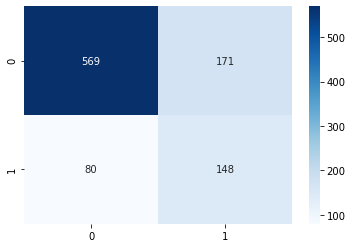

In [100]:
sns.heatmap((metrics.confusion_matrix(default_train['default'],y_class_pred)), annot=True,cmap="Blues", fmt='0');

In [111]:
#recall
print('recall of the model {}'.format(148/228))
#precision
print('precision of the model {}'.format(148/(148+171)))

recall of the model 0.6491228070175439
precision of the model 0.46394984326018807


In [104]:
(569+148)/(569+171+80+148) #improved accuracy

0.7407024793388429

In [107]:
y_class_pred_test= []
for i in range (0, len(y_prob_test)):
    if np.array(y_prob_test)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

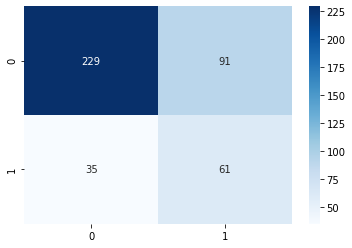

In [108]:
sns.heatmap((metrics.confusion_matrix(default_test['default'],y_class_pred_test)), annot=True,cmap="Blues", fmt='0');

In [110]:
print(metrics.classification_report(default_test['default'],y_class_pred_test))

#precision gone down 
#recall is 0.64 which is not very outstanding

              precision    recall  f1-score   support

           0       0.87      0.72      0.78       320
           1       0.40      0.64      0.49        96

    accuracy                           0.70       416
   macro avg       0.63      0.68      0.64       416
weighted avg       0.76      0.70      0.72       416



Through Logistic Regression model, We could only obtain recall as 0.16 though the overall acuracy of the model was 79 percent much higher than the stats model we built after treating outliers and multicollinearity.

Considering the stats model that we built using the threshold value as 0.26, We observe though the model is not a best model, However, We have a high recall value here with not much compromising accuracy as 70 percent. 

Note: Recall is more important metric than any other in the case of default.